In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

# 7C: Working with Fourier Transforms in Python 

> <font color='blue'>Learning goals:</font> Creating a function which you can use to calculate the fourier transform. 
Structure of an experiment:
- Anticipate + Simulate (10+20+10 min): per person. This is homework and should be finished **before** you start your 4 hours practicum session
- Implement + Investigate (50 min): with your partner(group of 2)
- Compare + Conclude (5 min): with a group of 4(per table)


## BACKGROUND: Fourier transform
> <font color='grey'>⏳ Estimated time: 10 min</font>

In exercise 4A you learned how to work with fourier transforms on the oscilloscope. Thus, the concept of fourier transforms should now be familiar to you, however, in case you need a refresher the background information of 4A is copied below: 


*So far we have visualized our signals only in the time domain (amplitude vs. time). Using the oscilloscope, however, we can also visualize signals in the frequency or spectral domain (amplitude vs. frequency). The process of going from time to spectral domain is called a Fourier transform. The details will be explained later in much more detail during the labview sessions and the course Signals and Systems. Here, we will limit to observe the spectral domain of different waveforms in a qualitative way. In **Analysis**, you learned that the Fourier transform converts a function in the time domain $f(t)$ to a function in the frequency domain $\hat{f}(\omega)$, just the way a prisma splits a white light beam into all its constitutive colours, displaying the frequency spectrum of the white light. Remember that the equation for the Fourier transform is:*

$$
\hat{f}(\omega) = \int_{-\infty}^\infty f(t) e^{-i\omega t}\text{d}t
$$

*A sinusoid is characterized by a single frequency: sin⁡(ωt)=(exp⁡(iωt)-exp⁡(-iωt))/2i . It’s spectrum will show two peaks at ±ω. A block wave is always defined by a certain periodic subset of frequencies. To get a triangular wave, the higher harmonics must be blocked (as you more closely approach a single-frequency sine wave).In the image below you can see the Fourier Transform of a sine wave. You can calculate this mathematically, however, that is not at all necessary for this course. You should simply understand that this is what a FT of a sine wave looks like and that a fourier transform converts time to frequency domains.*

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/4A_Sineft.png" width=100%></img>


Just as there are analog (continuous) and digital (specific values) signals, there are also continuous and discrete fourier transforms. The above fourier transform is continuous, meaning that it has infinitely many values. Its counterpart is the discrete fourier transform (DFT), which looks like this:

$$
\hat{f}[\Omega] = \sum_{n=0}^{N-1} f[n] e^{-i \frac{2\pi}{N}\Omega n}, \Omega=0,...,N-1
$$

You do not have to memorize or understand this formula. 

## ANTICIPATE: 
> <font color='grey'>⏳ Estimated time: 20 min</font>

Using the following code (just below), answer these questions:
1. How do you calculate the sampling rate? 
2. What are the frequencies of the two signals? 
3. What are the amplitudes?

In [ ]:
Nsamples = 350
duration = 2 # seconds
time = np.linspace(0,duration,Nsamples)

### TO DO="print the value of the sampling rate"

 
freq1 = 5.0 # Hz
freq2 = 18.0 # Hz
voltage = 1.4 * np.sin( freq1 * 2.0 * np.pi * time) + 0.5 * np.sin( freq2 * 2.0 * np.pi * time)

In [ ]:
### TO DO="your prediction/ answers to the above questions"


## SIMULATE: Array Slicing 
> <font color='grey'>⏳ Estimated time: 10 min</font>

No simulation here, but you will briefly learn about the concept of array slicing as you will make use of this exentesively. This helps you when you want to make use of only a part of an array, by *slicing* it out. Feel free to skip this part if you are already familiar with array slicing.

In python, the syntax looks like this: `array[start:stop:step]`. You can find more information here: 

https://www.w3schools.com/python/numpy/numpy_array_slicing.asp 

Read the info below, and write your voltage slicing code

In [2]:
#2 ways of initiating an array that has numbers
import numpy as np
A=[1,2,3,4,5,6,7,8,9]

B=np.zeros(9)

print(type(B))# see what type B is 

for ii in range(len(B)): # filling in B with numbers 
    B[ii]=ii 

print(A), print(B), print(A==B), print(np.array_equal(A,B)) # see if they match

<class 'numpy.ndarray'>
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[False False False False False False False False False]
False


(None, None, None, None)

Note that A&B are not equal. This is due to the iterator ii starting at 0. You can simply adjust line in the `for` loop above to make A&B equal. 

To take out part of the array, check out the following options :

In [3]:
# take out one element:
print('1: ',A[5])

#take out the last element:
print('2: ',A[-1])



1:  6
2:  9


In [4]:
#take out a range of element:
print ('3: ',B[1:4])

# a range in steps ([start:stop:step]):
print ('4: ',B[1:8:2])

# a range in steps, starting at beginning, or stopping at the end
print ('5: ',B[:8:2])
print ('6: ',B[1::2])
print ('7: ',B[1:8:])

#you can even go backwards
print ('8: ',B[-1:0:-3])
print ('9: ',B[7:0:-3])

3:  [1. 2. 3.]
4:  [1. 3. 5. 7.]
5:  [0. 2. 4. 6.]
6:  [1. 3. 5. 7.]
7:  [1. 2. 3. 4. 5. 6. 7.]
8:  [8. 5. 2.]
9:  [7. 4. 1.]


If you can take out parts, you can:
1. also redine parts of an array (make sure both arrays have the same size)
2. combine 2 arrays into one bigger one. This operation is called `concatenation`


In [21]:
C=np.copy(A) # C is now a standalone copy. If you do C=A, then C&A both point at the same memory location
C[1:5]=B[5:1:-1]
print(C)

print(np.concatenate((A[1:5],B[5:1:-1])))



[1 5 4 3 2 6 7 8 9]
[2. 3. 4. 5. 5. 4. 3. 2.]


### Voltage slicing code
You are given an array containing measured voltage values below. Find the average maximum voltage and the average minimum voltage. You can do this by dividing the ` voltage` array into two, `highest_voltages` and `lowest_voltages`, and then getting their averages (with `np.mean`)

In [25]:
voltage = [-2,-3,-1,-2,-2,6,5,8,6,6]


### TO DO="highest_voltages=     #This should be the last 5 values of the array voltage"

### TO DO="lowest_voltages=      #This should be the first 5 values of the array voltage"

print(highest_voltages)
print(lowest_voltages)

### TO DO="average_highest_voltage=       #The average of the array highest_voltages"


### TO DO="average_lowest_voltage=        #The average of the array lowest_voltages"



print(average_highest_voltage) # should be 6.2
print(average_lowest_voltage) # should be -2.0

[6, 5, 8, 6, 6]
[-2, -3, -1, -2, -2]
6.2
-2.0


No precap this time, the steps to take to develop your fourier transfrom code is written below

## IMPLEMENT & INVESTIGATE 1: Discrete fourier transform
> <font color='grey'>⏳ Estimated time: 50 min</font>

We will mimic a voltage measurement with the data acquisition board. In the code below, `time` corresponds to the timepoints of a measurement and `voltage` corresponds to the measured voltage. We will measure `Nsamples=350` samples equally spaced over a time inverval duration of `dur = 2` seconds. You can calculate that this corresponds to a sampling rate of 175 Hz.

**Exercise 1:** Run the following cell and observe the voltage signal. 
* How can you see the signal is the sum of multiple sines (with different frequencies)?
* From this graph, can you derive how many sines are summed?

> **<font color='blue'>__Extra info:__</font>**
If the voltage were equal to a continuous (non-varying) 0.65, its fourier transform would contain one peak at freq=0 with amplitude 0.65.

The sampling rate equals: 175.0 Hz.


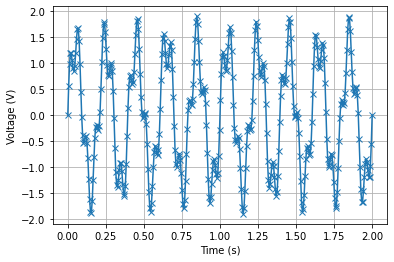

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# define sample signal parameters
Nsamples = 350
duration = 2 # seconds
time = np.linspace(0,duration,Nsamples)
freq1 = 5.0 # Hz
freq2 = 18.0 # Hz
voltage = 1.4 * np.sin( freq1 * 2.0 * np.pi * time) + 0.5 * np.sin( freq2 * 2.0 * np.pi * time)

plt.plot(time,voltage,'x-')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()

In [2]:
### TO DO =" How can you see the signal is a sum for >2 sines? Can you deerive how many sines? " 
 

As you see, the time domain does not display so clearly that the signal is composed of two frequencies with two separate amplitudes. The goal of this next exercise is to retrieve these frequencies and amplitudes using the graph of its DFT (=discrete fourier transform).

**Exercise 2:** Plot the DFT of `voltage` using the function `np.fft.fft()` (fft means fast Fourier transform).
1. How many peaks are displayed?
2. Why do we take the absolute value of the DFT, instead of plotting the DFT right away? 
3. Are the axes, amplitude and frequency, correct?

Text(0, 0.5, 'amplitude in V?')

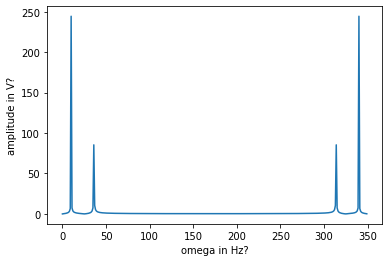

In [3]:
Fourier_transform_voltage = np.fft.fft( voltage )
plt.plot(np.abs(Fourier_voltage))
plt.xlabel('omega in Hz? - verify')
plt.ylabel('amplitude in V? - verify')

In [4]:
### TO DO = " Write your answer here to the above questions"


There are several peculiarities in this plot. The axis are incorrect, and you see 4 peaks instead of two. This you will have to adapt. The figure below will help you understand the steps you will need to take.

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/7B_steps_fft_code.jpg" width=70%></img>

Step 1:<br> 
we see four peaks instead of two. This is because Python calculates the DFT for positive and negative frequencies. The elements `1:Nsamples//2` of the list `Fourier_voltage` correspond to strictly positive $\omega$ and the elements `(Nsamples+1)//2:` correspond to strictly negative $\omega$. The element `(Nsamples+1)//2` stands for the most negative $\omega$. The element `0` corresponds to $\omega=0$. We should reorder the data, in order to arrange it on a frequency axis starting with the most negative frequency, going to the most positive frequency. 

Step2: <br>
We are only interested in the positive frequencies. Effectively, we want to sum the data for the absolute value of the frequencies. This means we have to invert the data for negatie frequencies, and add it to the data of the positive frequencies. This operation is actually equal to doubling the amplitude for f>0, and keep the amplitude for f=0 the same.
Note: when knowing how the frequency axis was originally arranged, step1&2 can be combined. 

Step 3: <br>
Both axis do not show the correct value. We can easily calculate the correct frequency axis using only half of `np.fft.fftfreq(Nsamples, d=duration/Nsamples)` which corresponds to f>=0. <br>
The height of the peaks needs to be adapted as well. For this, you should know that we have to divide the DFT by the number of samples. The reason for this is explained in the appendix at the end of this document.

**Exercise 3:** Solve the above peculiarities and plot the DFT in the frequency range $\omega \in [0,\frac{f_\text{sampling}}{2}]$. Your code should also work when `Nsamples` is odd, and for a DC offset. This will be tested in a later exercise. 

In [5]:
#take fft of your sample
Fourier_voltage = np.fft.fft( voltage )

# extract freq
DFT_frequencies = np.fft.fftfreq(Nsamples, d=duration/Nsamples)[... : ...] 
# use only f>=0. Hint: plot/print the values and determine which correspond to f>=0

# data for plotting
DFT_plot = np.abs( Fourier_voltage[... :... ] ) # which half of the original DFT voltage do you want to plot 
DFT_plot[1:] += np.abs( Fourier_voltage[...:...:...] # in order to use (and not throw away) the amplitudes of the other half, 
                            # correctly add those amplitude here, mind the direction/order [start:stop:step]
DFT_plot = DFT_plot/...  # you have to divide, in order to get the right amplitude

plt.plot( DFT_frequencies, DFT_plot )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

SyntaxError: invalid syntax (<ipython-input-5-43b89c0b4e24>, line 3)

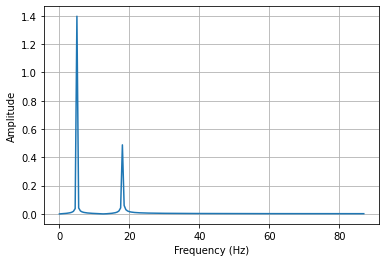

In [7]:
### TO DO="copy the given above code plus adapt it to make it work"


> <font color='blue'>Hints:</font> If you did this correctly, you should see two peaks at 5 and 18 Hz with amplitudes 1.4 and 0.5. This is exactly the frequency spectrum that we created in exercise 1. 
> * If your peaks are twice as low, you did not place the positive and negative frequencies on top of each other correctly. They are probably off by one index. 
> * If you have even smaller peaks, you probably did not take the absolute value of the DFT first before placing the frequencies on top of each other.




If everything worked out well, use your previous code to make a function `calculate_fft()`. The input parameters are:
* `signal`: the signal in the time domain
* `dur`: the duration of the signal in seconds
* `rate`: the sampling rate of the signal in Hz

As you may see, we already wrote the backbone of this function. It allows you to call the function with only `dur` or only `rate`. The code will calculate the missing one automatically. If you specify `dur` and `rate`, the code will check if they are coherent with the length of the signal.

**Exercise 4:** Complete this calculate_fft function that calculates the DFT. ***You will use this function later in the course.*** Save it somewhere where you can access it easily

In [ ]:
def calculate_fft( signal, dur=None, rate=None ) -> tuple:
    
    import numpy as np
    
    Nsamples = len(signal)

    # CHECK IF ENOUGH VARIABLES ARE GIVEN AND CALCULATE MISSING VARIABLES - don't change this code
    assert not (dur is None and rate is None), "You have to define at least one of these two variables: 'dur' or 'rate'."
    dur = dur or Nsamples/rate
    rate = rate or Nsamples/dur
    assert dur == Nsamples/rate, "The sample duration 'dur' (" + str(dur)+" sec) and sampling frequency 'rate' ("+str(rate)+" Hz) do not correspond to the length of 'signal' ("+str(Nsamples)+")."
     
    
    # CALCULATE THE FREQUENCY AXIS - complete this
    frequency_axis = ...
    
    # CALCULATE THE FOURIER TRANSFORM - complete this
    DFT = ...
    ...
    
    
    return frequency_axis, DFT

##Test your function
duration = 2
Nsamples = 351
tt = np.linspace(0,duration,Nsamples)
signal = 1.4 * np.sin( 5.0 * 2.0 * np.pi * time) + 0.5 * np.cos( 18.0 * 2.0 * np.pi * time) - 0.8
frequency_axis,DFT=calculate_fft(signal,dur=duration)

plt.plot(frequency_axis,DFT)

In [9]:
### TO DO="your code for the calculate_fft function"


**Exercise 5**: Test your function professionally using this piece of test code. Below hints are given, when failing tests 3,4,7,8.



In [11]:
import unittest

class TestCode(unittest.TestCase):
    
    def test_1_evenNumberOfSamples_FourierCoefficients(self):
        _,y = calculate_fft( signal=[1, 0, -1, 0, 1, 0, -1, 0], dur=1, rate=8)
        self.assertTrue( (y == [0., 0., 1., 0.]).all() )
        
        _,y = calculate_fft( signal=[0, 0], dur=1, rate=2 )
        self.assertEqual( y, [0.] )
        
        _,y = calculate_fft( signal=[0, 0, 0, 0], dur=4, rate=1 )
        self.assertTrue( (y == [0., 0.]).all() )
        
    def test_2_evenNumberOfSamples_FrequencyAxis(self):
        omega,_ = calculate_fft( signal=[1, 0, -1, 0, 1, 0, -1, 0], dur=1, rate=8)
        self.assertTrue( (omega == [0., 1., 2., 3.]).all() )
        
        omega,_ = calculate_fft( signal=[0, 0], dur=1, rate=2 )
        self.assertEqual( omega, [0.] )
        
        omega,_ = calculate_fft( signal=[0, 0, 0, 0], dur=4, rate=1 )
        self.assertTrue( (omega == [0., 0.25]).all() )
        
    def test_3_oddNumerOfSamples_FourierCoefficients(self):
        _,y = calculate_fft( signal=[2, -1, -1, 2, -1, -1, 2, -1, -1], dur=1 , rate=9)
        self.assertTrue( (y == [0., 0., 0., 2.]).all() )
        
        _,y = calculate_fft( signal=[2, -1, -1, 2, -1, -1, 2, -1, -1], dur=2 , rate=4.5)
        self.assertTrue( (y == [0., 0., 0., 2.]).all() )
        
        _,y = calculate_fft( signal=[1, 0, -1], dur=1, rate=3 )
        self.assertEqual( y, [0.] )
        
    def test_4_oddNumerOfSamples_FrequencyAxis(self):
        omega,_ = calculate_fft( signal=[2, -1, -1, 2, -1, -1, 2, -1, -1], dur=1 , rate=9)
        self.assertTrue( (omega == [0., 1., 2., 3.]).all() )
        
        omega,_ = calculate_fft( signal=[2, -1, -1, 2, -1, -1, 2, -1, -1], dur=2 , rate=4.5)
        self.assertTrue( (omega == [0., 0.5, 1., 1.5]).all() )
        
        omega,_ = calculate_fft( signal=[1, 0, -1], dur=1, rate=3 )
        self.assertEqual( omega, [0.] )

    def test_5_specifyingDurOnly(self):
        omega,_ = calculate_fft( signal=[0, 0, 0, 0, 0, 0, 0, 0], dur=1)
        self.assertTrue( (omega == [0., 1., 2., 3.]).all() )
        omega,_ = calculate_fft( signal=[0, 0, 0, 0, 0, 0, 0, 0, 0], dur=1)
        self.assertTrue( (omega == [0., 1., 2., 3.]).all() )
        
    def test_6_specifyingRateOnly(self):
        omega,_ = calculate_fft( signal=[0, 0, 0, 0, 0, 0, 0, 0], rate=8)
        self.assertTrue( (omega == [0., 1., 2., 3.]).all() )
        omega,_ = calculate_fft( signal=[0, 0, 0, 0, 0, 0, 0, 0, 0], rate=9)
        self.assertTrue( (omega == [0., 1., 2., 3.]).all() )

    def test_7_offset(self):
        _,y = calculate_fft( signal=[1, 1, 1], dur=1, rate=3)
        self.assertEqual( y[0], 1. )
        self.assertNotEqual( y[0], 2. )
        _,y = calculate_fft( signal=[2, 1, 2, 1], dur=1, rate=4)
        self.assertEqual( y[0], 1.5 )
        self.assertNotEqual( y[0], 3. )
        
    def test_8_negativeOffset(self):
        _,y = calculate_fft( signal=[-1, -1, -1], dur=1, rate=3)
        self.assertEqual( y[0], -1. )    
        _,y = calculate_fft( signal=[-1, -1, -1, -1], dur=1, rate=4)
        self.assertEqual( y[0], -1. )    

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], 
                  verbosity=2, exit=False)

test_1_evenNumberOfSamples_FourierCoefficients (__main__.TestCode) ... ok
test_2_evenNumberOfSamples_FrequencyAxis (__main__.TestCode) ... ok
test_3_oddNumerOfSamples_FourierCoefficients (__main__.TestCode) ... ok
test_4_oddNumerOfSamples_FrequencyAxis (__main__.TestCode) ... ok
test_5_specifyingDurOnly (__main__.TestCode) ... ok
test_6_specifyingRateOnly (__main__.TestCode) ... ok
test_7_offset (__main__.TestCode) ... ok
test_8_negativeOffset___optional_test (__main__.TestCode) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.005s

OK


> <font color='blue'>Hints for debugging:</font>

If something is wrong in `test 3` and `test 4`, your code does not handle inputs with an odd number of samples correctly. It is important that you correct this, because you will be using this function later on in the course.

If something is wrong in `test 7`, you should look at the zeroth Fourier coefficient in your output. It might be twice as large because of how you added the positive and negative frequencies. In that case, you should divide the zeroth coefficient by 2 or think of another way to solve this. If `test 8` failed as well, then go to next paragraph. The error in test 8 causes error in test 7.

If something is wrong in `test 8`, you might have to change the value of DFT[0] depending on the np.sign() of the average signal

For this assignment no recording is given, the above test gives better input on whether it works (and if not what to improve). 

## EXPLAIN & EVALUATE
> <font color='grey'>⏳ Estimated time: 5  min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 

Reflect whether you understood the calculate_fft function. 

**to be checked by the TA**: 
1. Which issues appeared at your first `unittest`, and how did you solve them?
2. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
3. How do think this notebook could be improved

In [ ]:
#7B Fourier in Python
### TO DO="1. Which issues appeared at your first unit test, and how did you solve them?"

### TO DO="2a. abstract"

### TO DO="2b. troubleshooting"

### TO DO="2c. code"

### TO DO="3. what changes would you suggest?"


## <font color='red'>Appendix on the Discrete Fourier transform [optional]</font>

This appendix is meant for students who would like to get more information about Fourier series and the Fourier transform. It is not part of the exams for *Electronic Instrumentation*. However, the information may be useful for courses like *Systems and Signals*, although it might also be difficult to understand without having attended such a course first.

### Brief note on Fourier series
In *Analysis 2*, you learned how to calculate the (continuous-time) Fourier series of a function. We started with the Fourier coefficients in the following form. We will assume that the signal is periodic with $T = \frac{2\pi}{\omega_0}$. We can rewrite these coefficients into a more condensed form (with $c_k$) using Euler's formula.

$$
f(t) \sim \frac{a_0}{2} + \sum_{k=1}^\infty a_k \cos{ \frac{2\pi k t}{T} } + \sum_{k=1}^\infty b_k \sin{ \frac{2\pi k t}{T} } = \sum_{k=-\infty}^\infty c_k e^{i \frac{2\pi k}{T} t}
$$

If you work out this out, you will obtain that $a_{k} = c_{k} + c_{-k}$ and $b_k = ic_k -ic_{-k}$ (for $k>1$) and $a_0 = 2c_0$. You will also find that $c_k$ can be calculated using an integral over one period $P$:

$$
c_k = \frac{1}{T} \int_P f(t) e^{-i\frac{2\pi k}{T} t} \text{d}t
$$

The Fourier series with $a_k$ and $b_k$ mean exactly the same as the Fourier series with $c_k$. It is a good exercise to convert the notations into each other yourself.

If we assume that we have measured a signal during one period with $N$ equially spaced sample points, we can say that $t \approx \frac{nT}{N}$, $\text{d}t \approx \frac{T}{N}$ and obtain the following approximation for $c_k$.

$$
c_k \approx \frac{1}{T} \sum_{n=0}^{N-1} \left( f(\frac{T}{N}n) e^{-i\frac{2\pi k}{N} n} \frac{T}{N} \right)
= \frac{1}{N} \sum_{n=0}^{N-1} f[n] e^{-i\frac{2\pi k}{N} n}
$$

For large enough $N$, this is a good approximation.

### Why divide the DFT by Nsamples?

Since computers can only store a discrete list of values, it is not possible that `np.fft.fft()` returns a continuous function. Instead, numpy calculates the following thing, which we call the discrete Fourier transform (DFT):

$$
\hat{f}[\Omega] = \sum_{n=0}^{N-1} f[n] e^{-i \frac{2\pi}{N}\Omega n}
$$

You may see that this is surprisingly similar to the approximation of the Fourier coefficients $c_k$ mentioned above. Therefore, we should say that numpy actually returns $N$ Fourier coefficients $c_k$ multiplied by $N$, calculated assuming that the given function values come from on an equally spaced grid in the interval $[0,T)$. If we do not specify the frequency axis, numpy will take $T=2\pi$. We used the notation $c_k = c(k)$ to make it more readible. The fractions in the indices should be rounded down.

$$
\texttt{np.fft.fft}( f ) = \left[N\cdot c(0),\ N\cdot c(1),\ N\cdot c(2)\ \cdots\ N\cdot c({\frac{N}{2}}),\ N\cdot c({-\frac{N+1}{2}}),\ N\cdot c({-\frac{N+1}{2}+1})\ \cdots\ N\cdot c({-2}),\ N\cdot c({-1}) \right]
$$

As you see, the first half of the list corresponds to positive frequencies and the other half to strictly negative frequencies.

You can see that this is true in the following example. We can expand $\sin{t} =\frac{e^{it} - e^{-it}}{2i} $ and $\cos{t} = \frac{e^{it} + e^{-it}}{2}$ into complex exponentials, revealing the Fourier coefficients $c_k$. Note that numpy takes $T = 2\pi$ by default if we do not calculate the frequency axis.

\begin{gather*}
f(t) = 0.6 \cdot \sin(t) +0.2 \cdot \cos(2t)+ 4.5 \\
= 0.6 \cdot \frac{e^{it} - e^{-it}}{2i} + 0.2 \cdot \frac{e^{i2t} + e^{-i2t}}{2} + 4.5 \\
= 0.3 i e^{-it} - 0.3 i e^{it} + 0.1 e^{-2it} + 0.1 e^{2it} + 4.5 e^{0} \\
= c_{-1} e^{-it} + c_{1} e^{it} + c_{-2} e^{-i2t} + c_{2} e^{i2t} + c_0 \\
= \sum_{k=-\infty}^\infty c_k e^{i \frac{2\pi k}{T} t}
\end{gather*}

This shows that we should have $c_{1} = - c_{-1} =-0.3i$, $c_{2} = c_{-2} = 0.1$, $c_0 = 4.5$ and $c_k=0$ for all remaining values of $k$. If `N=10`, we would expect the following list from `np.fft.fft`: `[45 + 0i, 0-3i, 0+1i, 0+0i, 0+0i, 0+0i, 0+0i, 0-1i, 0+3i]`. You can check that this is approximately correct.

In [8]:
N = 10
time = np.linspace(0,2*np.pi,N)
y = 0.6*np.sin( time ) + 0.2*np.cos( 2*time ) + 4.5
print( np.fft.fft(y) )

[45.2       +0.00000000e+00j  1.09230095-2.56119820e+00j
  0.50753201+9.81852325e-01j -0.35310189+7.76663109e-03j
 -0.23754   +2.25345350e-02j -0.21838214+1.11022302e-16j
 -0.23754   -2.25345350e-02j -0.35310189-7.76663109e-03j
  0.50753201-9.81852325e-01j  1.09230095+2.56119820e+00j]


If you pick higher `N`, you will see that the pattern becomes more precise. This has to do with the Nyquist-Shannon sampling theorem and nonideal sampling. Here, we used `N=1e6`. Note how all the elements of the list increase with $N$. 

In [9]:
N = 1000000
time = np.linspace(0., 2.*np.pi,N)
y = 0.6*np.sin( time ) + 0.2*np.cos( 2.*time ) + 4.5
print( np.round(np.fft.fft(y)) )

[ 4.5e+06+0.e+00j  1.0e+00-3.e+05j  1.0e+05+1.e+00j ... -0.0e+00-0.e+00j
  1.0e+05-1.e+00j  1.0e+00+3.e+05j]


That is the reason that you have to divide the values of `np.fft.fft()` by $N$. To repeat, `np.fft.fft()` does not precisely calculate the DTFT, but yields an approximation for Fourier coefficients $c_k$ multiplied by $N$ instead.

### What happens if we put the coefficients on top of each other?

In essense, the Fourier series of a signal decomposes the signal into a weighted sum of constitutive complex exponentials. The angle $\angle c_k$ (remember that $c_k$ is a complex number) corresponds to the phase shift of the constitutive complex exponential $e^{i \frac{2\pi k}{T}t}$ in the signal. The magnitude $\mid c_k \mid$ corresponds to the amplitude of this complex exponential.


Let us take the previous example again:

$$f(t) = 0.6 \cdot \sin(t) +0.2 \cdot \cos(2t)+ 4.5 = 0.3 i e^{-it} - 0.3 i e^{it} + 0.1 e^{-2it} + 0.1 e^{2it} + 4.5 e^{0}$$

The Fourier coefficients are given by $c_{1} = - c_{-1} =-0.3i$, $c_{2} = c_{-2} = 0.1$, $c_0 = 4.5$ and $c_k=0$ for all remaining values of $k$. We see that $\angle c_2 = \angle c_{-2} = 0$, because they correspond to the cosine part. Also, $\angle c_{-1} = -\angle c_1 = \angle 0.3 i = \frac{\pi}{2}$ correspond to the sine part. Indeed, we know that the sine and the cosine differ $90^{\circ}$ in phase.

If we take the magnitude of a Fourier coefficient, we essentially get rid of this phase shift of the complex exponential. Adding the coefficients for the positive and the negative frequencies means that we add the amplitudes of all parts of a signal irrespective of the phase. 

### What makes the fast Fourier transform fast?

In this section, we will discuss the Cooley-Turkey algorithm. We will start with the definition of the discrete Fourier transform (DFT), where $k=0,...,N-1$.

$$
\hat{f}[k] = \sum_{n=0}^{N-1} f[n] e^{-i \frac{2\pi}{N}k n}
$$

Each summation takes approximately $N$ operations and we have approximately $N$ values of $k$. Therefore, we need $\mathcal{O}( N^2 )$ operations for the entire DFT. (It is common to use Big O notation for algorithm complexity)

Let us assume that $N$ is a power of two. Therefore, we can easily divide $N$ by 2 without worrying about border cases. We will divide the summation into two parts, namely for even and off values of $n$.

$$
\hat{f}[k] = \sum_{m=0}^{N/2-1} f[2m] e^{-i\frac{2\pi}{N} k(2m)} + \sum_{m=0}^{N/2-1} f[2m+1] e^{-i\frac{2\pi}{N} k(2m+1)}
$$

We will factor out $e^{-i\frac{2\pi}{N}k}$ and rewrite the sums as two DFTs again. We will call those new DFTs $E_k$ (for even terms) and $O_k$ (for odd terms).

$$
\hat{f}[k] = \sum_{m=0}^{N/2-1} f[2m] e^{-i\frac{2\pi}{N/2} km} + e^{-i\frac{2\pi}{N}k}\sum_{m=0}^{N/2-1} f[2m+1] e^{-i\frac{2\pi}{N/2} km}
= E_k + e^{-i\frac{2\pi}{N}k} O_k
$$

Now, we will use the above formula to calculate $\hat{f}[k+\frac{N}{2}]$. We will see that some terms will vanish because of the complex exponentials.

\begin{gather*}
\hat{f}[k+\frac{N}{2}] = \sum_{m=0}^{N/2-1} f[2m] e^{-i\frac{2\pi}{N/2} (k+\frac{N}{2})m} + e^{-i\frac{2\pi}{N}(k+\frac{N}{2})}\sum_{m=0}^{N/2-1} f[2m+1] e^{-i\frac{2\pi}{N/2} (k+\frac{N}{2})m} \\
= \sum_{m=0}^{N/2-1} f[2m] e^{-i\frac{2\pi}{N/2} km}e^{-i2\pi m} + e^{-i\frac{2\pi}{N}k} e^{-i\pi}\sum_{m=0}^{N/2-1} f[2m+1] e^{-i\frac{2\pi}{N/2} km}e^{-i2\pi m} \\
= \sum_{m=0}^{N/2-1} f[2m] e^{-i\frac{2\pi}{N/2} km} - e^{-i\frac{2\pi}{N}k}\sum_{m=0}^{N/2-1} f[2m+1] e^{-i\frac{2\pi}{N/2} km} 
= E_k - e^{-i\frac{2\pi}{N}k}O_k
\end{gather*}

As you can see, we can use the intermediate results $E_k$ and $O_k$ twice. Furthermore, $E_k$ and $O_k$ are themselves DFTs with half the amount of sample points. Therefore, we can apply the same trick recursively and reduce the number of operations. In an *Algorithms and Data Structures* course, you will learn that this recursion reduces the total time complexity to $\mathcal{O}(N\log N)$.

In [ ]:
# if you were really stuck, we still have the movie from last year
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ZCpaHJz5UpU', width = 600, height = 450)